# Indian Car Sales Analysis

## Analytical Questions

### 1. General Data Exploration:
- What are the unique Brands and Model Names present in the dataset?
- What is the distribution of Car Type (e.g., SUV, Sedan, Hatchback)?
- How many cars are listed for sale for each Fuel Type (e.g., Petrol, Diesel, CNG)?
- What is the distribution of Transmission types (e.g., Manual, Automatic)?
- What are the top 5 States with the highest number of car listings?
- How many cars have been involved in Accidental incidents?
### 2. Price Analysis:
- What is the average Price of cars based on their Brand?
- How does Price vary with Year of manufacture? Is there a clear trend (e.g., older cars are cheaper)?
- Is there a relationship between Kilometers driven and Price?
- How does Price differ across different Fuel Types and Transmission types?
- What is the average Price for cars based on their Owner type (e.g., 1st, 2nd, 3rd+)?
- Are Accidental cars significantly cheaper than non-accidental cars?
### 3. Car Specifications and Performance:
- Which Car Type has the highest average Kilometers driven?
- Are there any specific Model Variants that have a very high or very low average Kilo-meters?
- What is the most common Fuel Type for SUVs versus Hatchbacks?
### 4. Geographical Analysis:
- Which State has the highest average Price for cars?
- Is there a correlation between State and Fuel Type preference?


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Import Data

In [2]:
df = pd.read_csv('Car Sell Dataset.csv')

In [3]:
df.head()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182


## Exploratory Data Analysis

In [4]:
df.shape # Columns & Rows of the data

(140904, 12)

In [5]:
df.info() # Data Type & Non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140904 entries, 0 to 140903
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Brand          140904 non-null  object
 1   Model Name     140904 non-null  object
 2   Model Variant  140904 non-null  object
 3   Car Type       140904 non-null  object
 4   Transmission   140904 non-null  object
 5   Fuel Type      140904 non-null  object
 6   Year           140904 non-null  int64 
 7   Kilometers     140904 non-null  int64 
 8   Owner          140904 non-null  object
 9   State          140904 non-null  object
 10  Accidental     140904 non-null  object
 11  Price          140904 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 12.9+ MB


In [6]:
df.dtypes # Data types

Brand            object
Model Name       object
Model Variant    object
Car Type         object
Transmission     object
Fuel Type        object
Year              int64
Kilometers        int64
Owner            object
State            object
Accidental       object
Price             int64
dtype: object

In [7]:
df['Age of Car'] = datetime.datetime.now().year - df['Year'] # Finding Age of cars

In [8]:
df.head()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price,Age of Car
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253,8
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050,7
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923,23
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500,12
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182,14


In [9]:
df.isnull().sum() # Finding null Values

Brand            0
Model Name       0
Model Variant    0
Car Type         0
Transmission     0
Fuel Type        0
Year             0
Kilometers       0
Owner            0
State            0
Accidental       0
Price            0
Age of Car       0
dtype: int64

In [10]:
df.columns # Column names as array list

Index(['Brand', 'Model Name', 'Model Variant', 'Car Type', 'Transmission',
       'Fuel Type', 'Year', 'Kilometers', 'Owner', 'State', 'Accidental',
       'Price', 'Age of Car'],
      dtype='object')

In [11]:
df.describe() # Summary stats of numarical columns

,Year,Kilometers,Price,Age of Car
count,140904.000000,140904.000000,1.409040e+05,140904.000000
mean,2016.960391,95024.595987,7.617872e+05,8.039609
std,5.106106,49133.157878,4.438578e+05,5.106106
min,2000.000000,10000.000000,5.005500e+04,2.000000
25%,2014.000000,52421.000000,4.116420e+05,4.000000
50%,2018.000000,94973.500000,6.828030e+05,7.000000
75%,2021.000000,137618.000000,1.034178e+06,11.000000
max,2023.000000,179998.000000,2.744280e+06,25.000000


In [12]:
df.describe(include = 'object') # Summary stats of catagorical columns

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Owner,State,Accidental
count,140904,140904,140904,140904,140904,140904,140904,140904,140904
unique,18,84,82,5,2,5,3,27,2
top,Maruti Suzuki,Dzire,V,Hatchback,Manual,Petrol,1st,Maharashtra,No
freq,54030,6157,14975,55890,119793,79187,75429,24613,129639


In [13]:
df.nunique() # Nos. of unique values per column

Brand               18
Model Name          84
Model Variant       82
Car Type             5
Transmission         2
Fuel Type            5
Year                24
Kilometers       95860
Owner                3
State               27
Accidental           2
Price            17745
Age of Car          24
dtype: int64

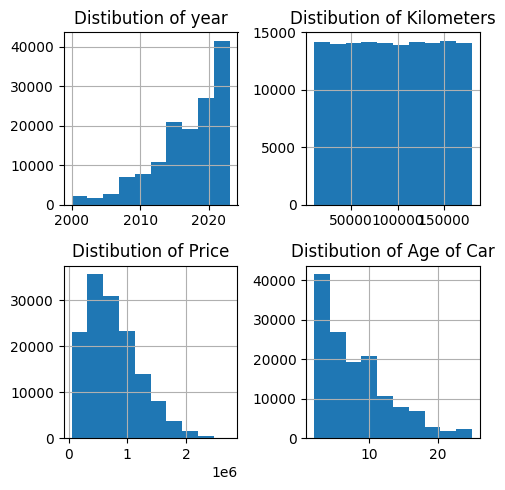

In [14]:
plt.figure(figsize = (5,5))
# plot - 1
plt.subplot(2,2,1)
df['Year'].hist(bins = 10)
plt.title('Distibution of year')

# plot - 2
plt.subplot(2,2,2)
df['Kilometers'].hist(bins = 10)
plt.title('Distibution of Kilometers')

# plot - 3
plt.subplot(2,2,3)
df['Price'].hist(bins = 10)
plt.title('Distibution of Price')

# plot - 4
plt.subplot(2,2,4)
df['Age of Car'].hist(bins = 10)
plt.title('Distibution of Age of Car')

plt.tight_layout()
plt.show()

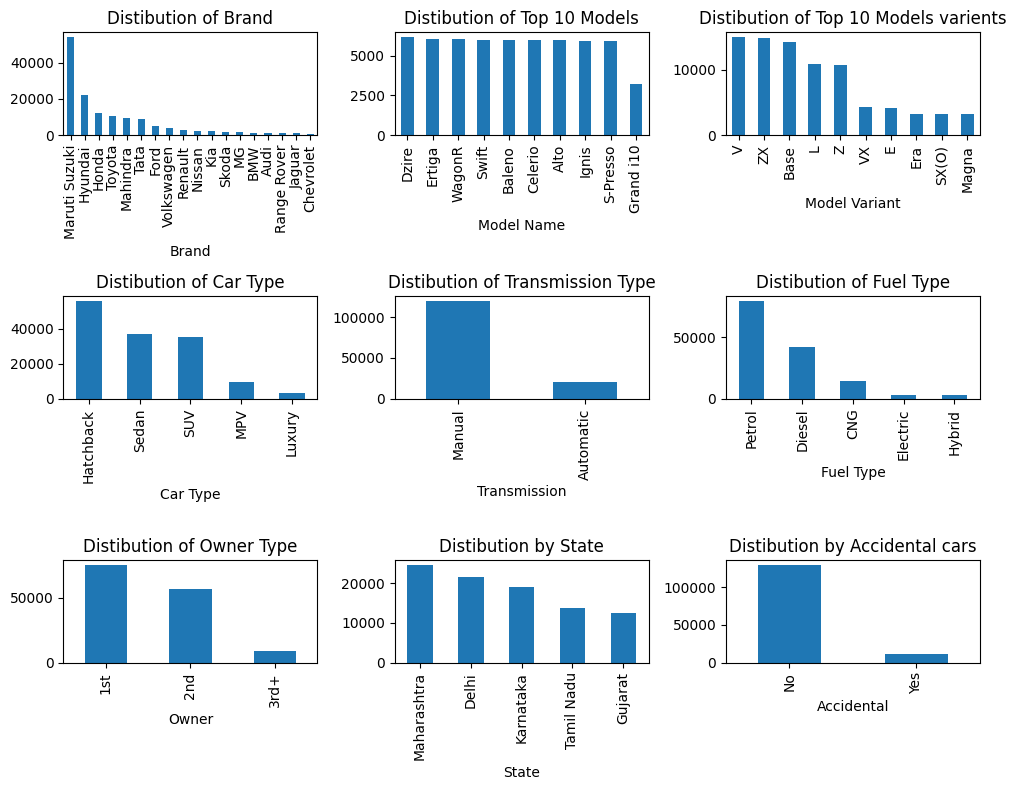

In [15]:
plt.figure(figsize = (10,8))

# plot - 1
plt.subplot(3,3,1)
df['Brand'].value_counts().plot(kind = 'bar')
plt.title('Distibution of Brand')

# plot - 2
plt.subplot(3,3,2)
df['Model Name'].value_counts().head(10).plot(kind = 'bar')
plt.title('Distibution of Top 10 Models')

# plot - 3
plt.subplot(3,3,3)
df['Model Variant'].value_counts().head(10).plot(kind = 'bar')
plt.title('Distibution of Top 10 Models varients')

# plot - 4
plt.subplot(3,3,4)
df['Car Type'].value_counts().plot(kind = 'bar')
plt.title('Distibution of Car Type')

# plot - 5
plt.subplot(3,3,5)
df['Transmission'].value_counts().plot(kind = 'bar')
plt.title('Distibution of Transmission Type')

# plot - 6
plt.subplot(3,3,6)
df['Fuel Type'].value_counts().plot(kind = 'bar')
plt.title('Distibution of Fuel Type')

# plot - 7
plt.subplot(3,3,7)
df['Owner'].value_counts().plot(kind = 'bar')
plt.title('Distibution of Owner Type')

# plot - 8
plt.subplot(3,3,8)
df['State'].value_counts().head().plot(kind = 'bar')
plt.title('Distibution by State')

# plot - 9
plt.subplot(3,3,9)
df['Accidental'].value_counts().head().plot(kind = 'bar')
plt.title('Distibution by Accidental cars')

plt.tight_layout()
plt.show()

In [16]:
df.groupby('Brand')['Model Name'].unique() # Unique Brand Names with thair models

Brand
Audi                                          [A6, Q7, A4, Q5, Q3]
BMW                                   [5 Series, X3, 3 Series, X1]
Chevrolet                       [Tavera, Beat, Cruze, Sail, Spark]
Ford                           [Aspire, Figo, EcoSport, Endeavour]
Honda                              [City, Jazz, Brio, WR-V, Amaze]
Hyundai           [Grand i10, Verna, Venue, Aura, Creta, i20, i10]
Jaguar                                            [XE, F-Pace, XF]
Kia                                        [Sonet, Seltos, Carens]
MG                                          [Hector, ZS EV, Astor]
Mahindra                   [TUV300, XUV500, Bolero, Thar, Scorpio]
Maruti Suzuki    [Alto, Dzire, Baleno, Ignis, Swift, Ertiga, Ce...
Nissan                            [Terrano, Sunny, Micra, Magnite]
Range Rover                [Evoque, Velar, Discovery Sport, Sport]
Renault                              [Kwid, Kiger, Triber, Duster]
Skoda                     [Rapid, Superb, Slavia, Kushaq

In [17]:
cars_per_fuel = df.groupby('Fuel Type')['Car Type'].count().reset_index().rename(columns = {"Car Type" : "Count of Cars"})
cars_per_fuel # Nos of ars listed per fuel type

,Fuel Type,Count of Cars
0,CNG,14054
1,Diesel,42038
2,Electric,2853
3,Hybrid,2772
4,Petrol,79187


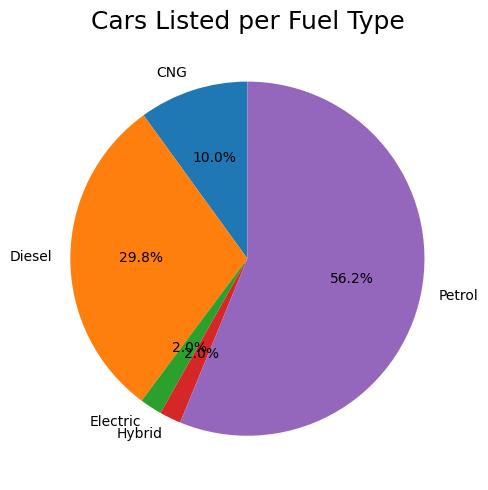

In [18]:
plt.figure(figsize=(8,5))
plt.pie(cars_per_fuel['Count of Cars'], labels = cars_per_fuel['Fuel Type'], autopct = '%1.1f%%', startangle = 90)
plt.title('Cars Listed per Fuel Type', fontsize = 18)
plt.tight_layout()
plt.show()

In [19]:
cars_per_state = df.groupby('State')['Car Type'].count().reset_index().sort_values('Car Type',ascending = False).rename(columns = {"Car Type" : "Count of Cars"}).head()
cars_per_state # Nos of cars listed per state

,State,Count of Cars
15,Maharashtra,24613
5,Delhi,21518
12,Karnataka,18981
22,Tamil Nadu,13678
7,Gujarat,12389


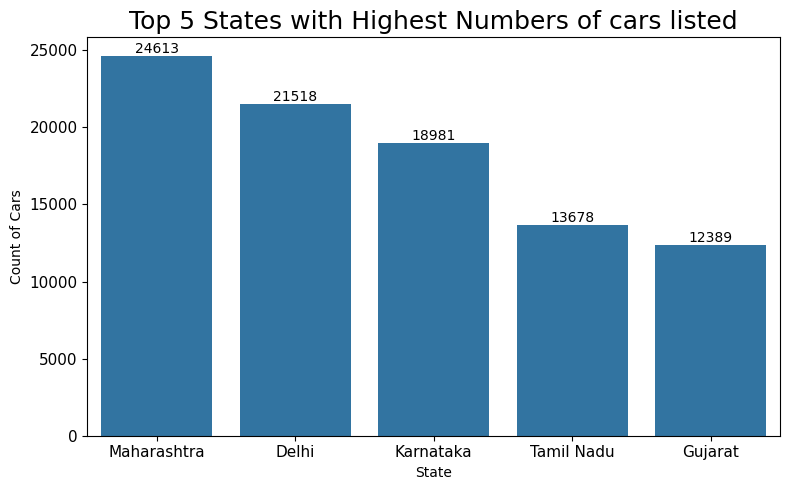

In [20]:
plt.figure(figsize=(8,5))
ax = sns.barplot(y = cars_per_state['Count of Cars'], x = cars_per_state['State'])
for x,y in zip(cars_per_state['State'],cars_per_state['Count of Cars']):
    plt.text(x,y,f"{y:.0f}", ha = 'center', va = 'bottom', fontsize = 10)

plt.title('Top 5 States with Highest Numbers of cars listed', fontsize = 18)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.tight_layout()
plt.show()

In [21]:
price_per_brand = df.groupby('Brand')['Price'].mean().reset_index().sort_values('Price',ascending = False).head(10).rename(columns = {'Price' : 'Average Car Price (₹)'})
price_per_brand # Top 10 Brand with highest Average Car Price

,Brand,Average Car Price (₹)
8,MG,1.024061e+06
7,Kia,1.002335e+06
15,Tata,9.023049e+05
13,Renault,8.849282e+05
12,Range Rover,8.456351e+05
6,Jaguar,7.915833e+05
16,Toyota,7.905693e+05
14,Skoda,7.740658e+05
5,Hyundai,7.629213e+05
0,Audi,7.621487e+05


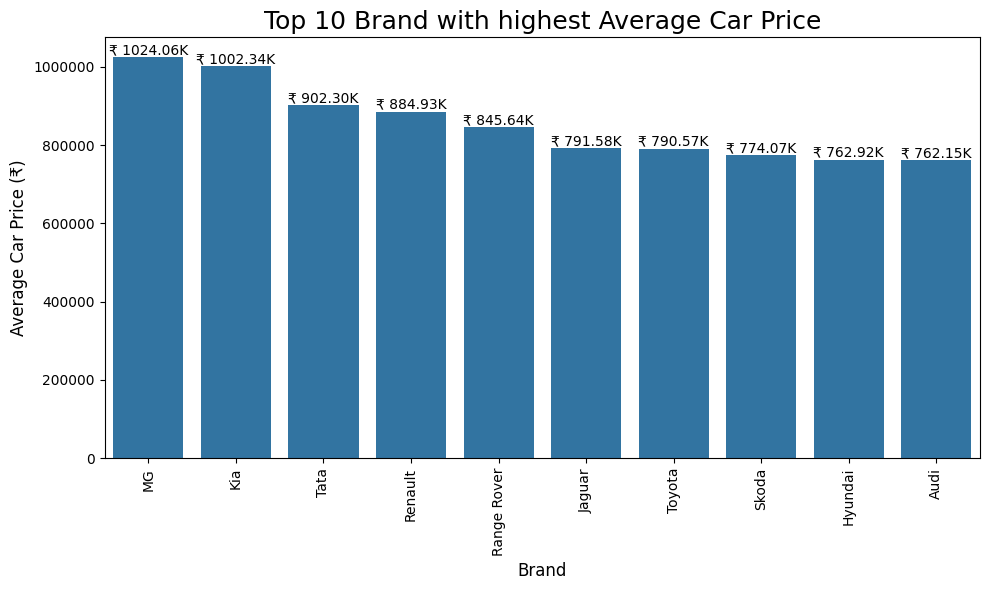

In [22]:
plt.figure(figsize = (10,6))
sns.barplot(y =price_per_brand['Average Car Price (₹)'], x = price_per_brand['Brand'])
plt.title('Top 10 Brand with highest Average Car Price', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Average Car Price (₹)', fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')

for i, y in enumerate(price_per_brand['Average Car Price (₹)']):
    plt.text(i, y, f"₹ {y / 1000:.2f}K", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

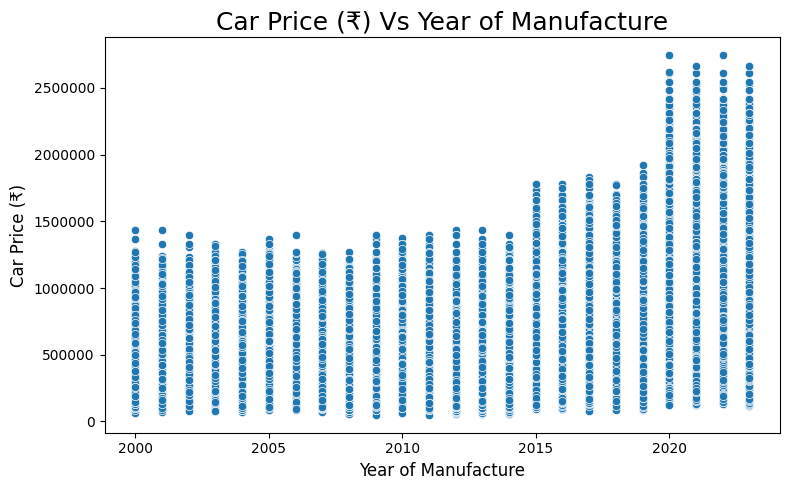

In [40]:
# Car Price (₹) Vs Manufacturing Year Trand
plt.figure(figsize = (8,5))
sns.scatterplot(x = df['Year'], y= df['Price'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Car Price (₹) Vs Year of Manufacture', fontsize = 18)
plt.xlabel('Year of Manufacture', fontsize = 12)
plt.ylabel('Car Price (₹)', fontsize = 12)
plt.tight_layout()
plt.show()

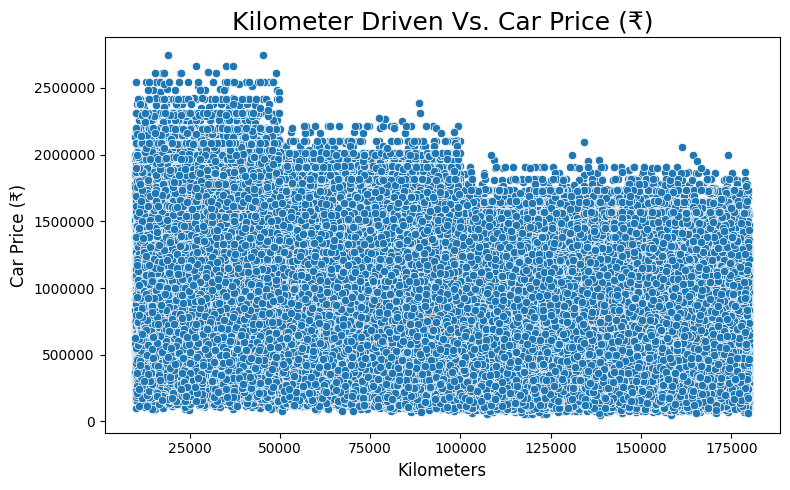

In [24]:
# Kilometer Driven Vs Car Price(₹)
plt.figure(figsize = (8,5))
sns.scatterplot(x = df['Kilometers'], y= df['Price'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Kilometer Driven Vs. Car Price (₹)', fontsize = 18)
plt.xlabel('Kilometers', fontsize = 12)
plt.ylabel('Car Price (₹)', fontsize = 12)
plt.tight_layout()
plt.show()

In [25]:
price_by_fuel_transmission = df.pivot_table(values = 'Price', index = 'Fuel Type', columns = 'Transmission', aggfunc = 'mean')
price_by_fuel_transmission # Average Car Price by Fuel type & Transmission Type

Transmission,Automatic,Manual
Fuel Type,,
CNG,774384.314957,714289.249499
Diesel,819664.907130,751407.605359
Electric,903754.705742,829116.708008
Hybrid,846460.368932,794026.888983
Petrol,830379.117343,752833.994985


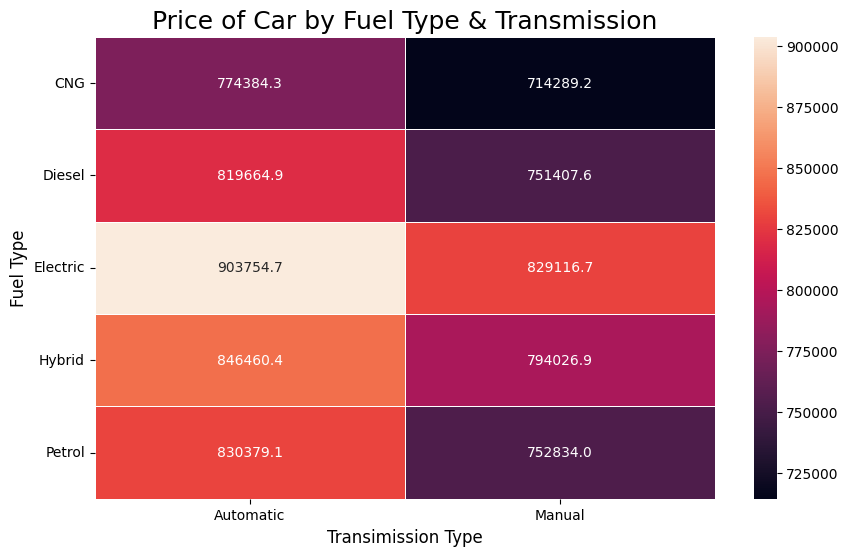

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(price_by_fuel_transmission, annot=True, fmt=".1f", linewidths=.5)
plt.title('Price of Car by Fuel Type & Transmission', fontsize = 18)
plt.yticks(rotation = 0)
plt.xlabel('Transimission Type', fontsize = 12)
plt.ylabel('Fuel Type', fontsize = 12)
plt.show()

In [27]:
avg_price_by_owner_type = df.groupby('Owner')['Price'].mean().reset_index().rename(columns = {'Price' : 'Average Car Price (₹)'})
avg_price_by_owner_type # Average Car Price Based on Ownership type

,Owner,Average Car Price (₹)
0,1st,878378.876559
1,2nd,665938.249345
2,3rd+,385554.501280


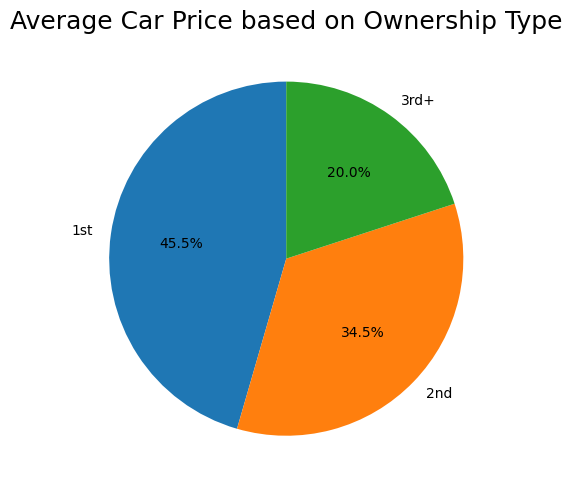

In [28]:
plt.figure(figsize = (10,5))
plt.pie(avg_price_by_owner_type['Average Car Price (₹)'], labels = avg_price_by_owner_type['Owner'], autopct = '%0.1f%%', startangle = 90)
plt.title('Average Car Price based on Ownership Type', fontsize = 18)
plt.tight_layout()
plt.show()

In [29]:
accident_vs_nonaccident = df.groupby('Accidental')['Price'].mean().sort_values(ascending = True).reset_index().rename(columns = {'Price' : 'Average Car Price (₹)'})
accident_vs_nonaccident # Average Car Price : Accidental Vs. Non-Accidental

,Accidental,Average Car Price (₹)
0,Yes,541556.469596
1,No,780924.153357


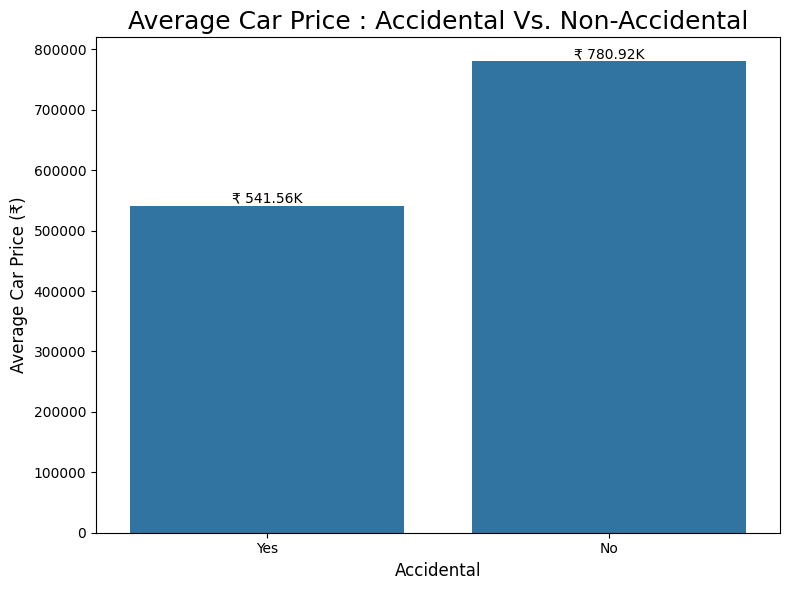

In [30]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x = accident_vs_nonaccident['Accidental'], y = accident_vs_nonaccident['Average Car Price (₹)'])
for i,y in enumerate(accident_vs_nonaccident['Average Car Price (₹)']):
    plt.text(i,y, f"₹ {y/1000:.2f}K", ha = 'center', va = 'bottom', fontsize = 10)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Average Car Price : Accidental Vs. Non-Accidental', fontsize = 18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Accidental', fontsize = 12)
plt.ylabel('Average Car Price (₹)', fontsize = 12)
plt.tight_layout()
plt.show()

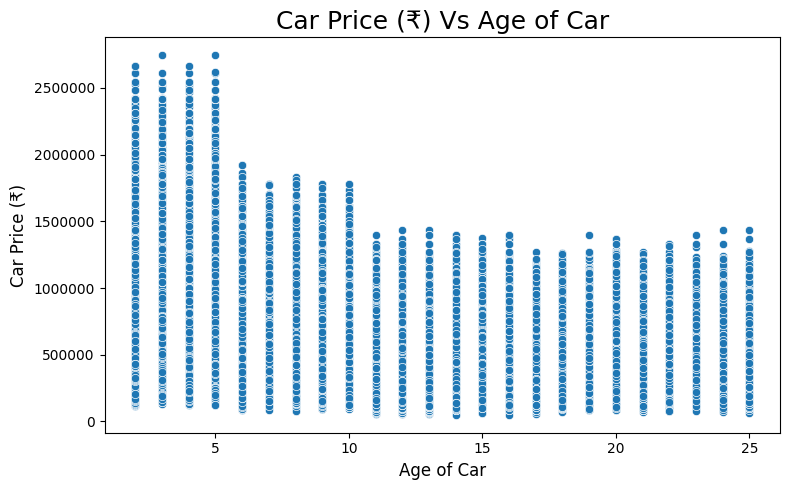

In [31]:
# Car Price (₹) Vs Car Age
plt.figure(figsize = (8,5))
sns.scatterplot(x = df['Age of Car'], y= df['Price'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Car Price (₹) Vs Age of Car', fontsize = 18)
plt.xlabel('Age of Car', fontsize = 12)
plt.ylabel('Car Price (₹)', fontsize = 12)
plt.tight_layout()
plt.show()

In [32]:
car_type_vs_km_driven = df.groupby('Car Type')['Kilometers'].mean().sort_values(ascending = False).reset_index()
car_type_vs_km_driven # CAr Type by Kilometer Driven

,Car Type,Kilometers
0,Luxury,95377.999107
1,SUV,95312.111105
2,Hatchback,95013.142906
3,Sedan,95000.787923
4,MPV,94019.897341


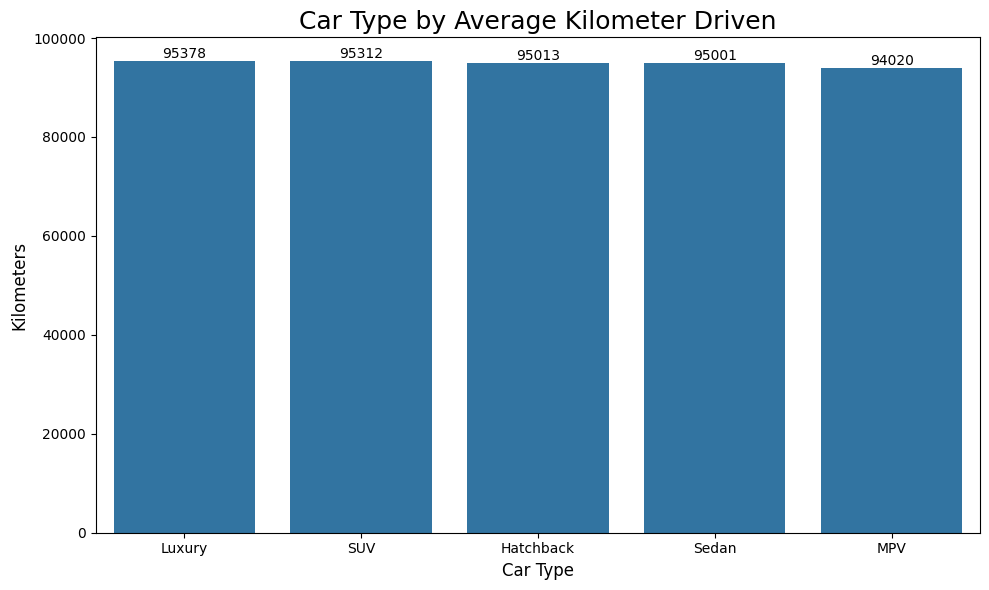

In [33]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x = 'Car Type', y = 'Kilometers', data = car_type_vs_km_driven)

for i,y in enumerate(car_type_vs_km_driven['Kilometers']):
    plt.text(i,y,f"{y:.0f}", ha = 'center', va = 'bottom')

plt.title('Car Type by Average Kilometer Driven', fontsize = 18)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Car Type', fontsize = 12)
plt.ylabel('Kilometers', fontsize = 12)

plt.tight_layout()
plt.show()

In [35]:
car_varient_with_km_driven = df.groupby('Model Variant')['Kilometers'].mean().sort_values(ascending = False).reset_index()

In [36]:
Top_5 = car_varient_with_km_driven.head() # Top 5 Model Varient with highest average kilometers driven
Top_5

,Model Variant,Kilometers
0,M Sport,100457.761494
1,L&K,98379.963415
2,Luxury Line,98367.633523
3,Portfolio,98348.764977
4,GTX,98237.057239


In [37]:
bottom_5 = car_varient_with_km_driven.tail() # Top 5 Model Varient with highest average kilometers driven
bottom_5

,Model Variant,Kilometers
77,HSE,89455.163121
78,HTK,89072.693750
79,Sharp,88928.794020
80,Monte Carlo,88112.479100
81,Active,88059.254181


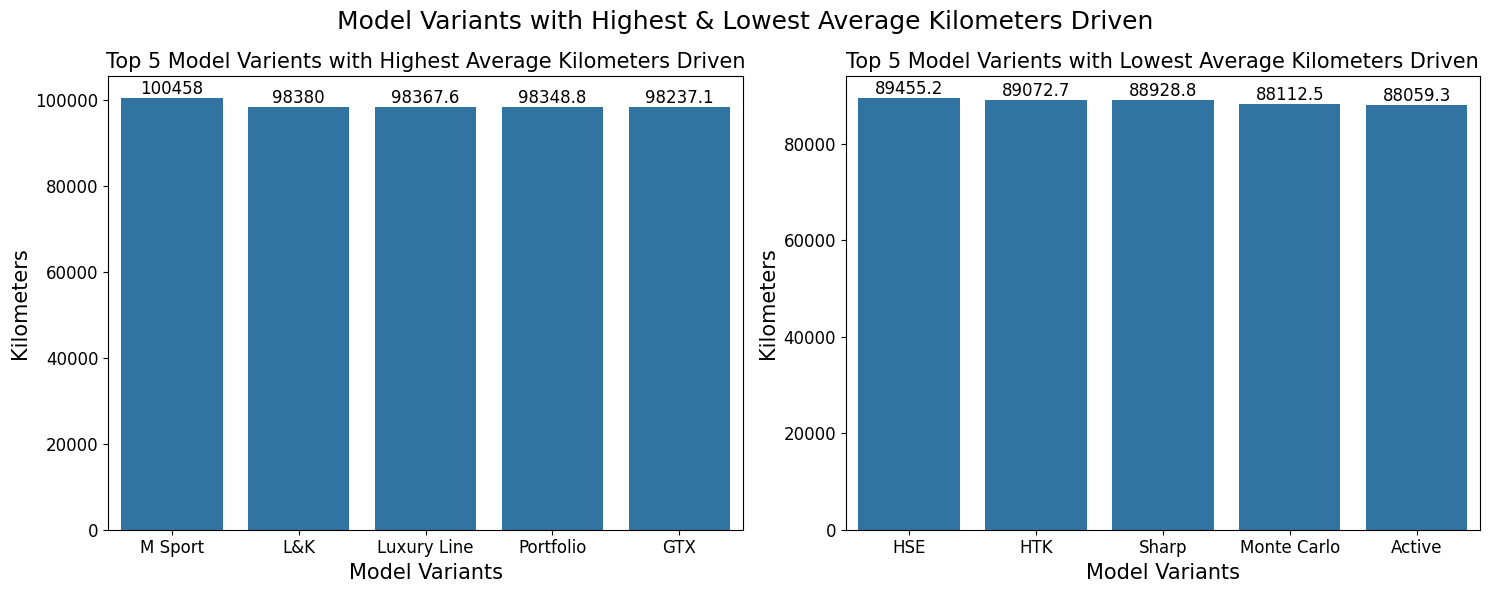

In [38]:
plt.figure(figsize = (15,6))

# Plot-1 (Top 5 Model Varients with Highest Average Kilometers Driven)

plt.subplot(1,2,1)
ax = sns.barplot(x = 'Model Variant', y = 'Kilometers', data = Top_5)
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title('Top 5 Model Varients with Highest Average Kilometers Driven', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Model Variants', fontsize = 15)
plt.ylabel('Kilometers', fontsize = 15)

# Plot-2 (Lowest 5 Model Varients with Highest Average Kilometers Driven)

plt.subplot(1,2,2)
ax = sns.barplot(x = 'Model Variant', y = 'Kilometers', data = bottom_5)
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title('Top 5 Model Varients with Lowest Average Kilometers Driven', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Model Variants', fontsize = 15)
plt.ylabel('Kilometers', fontsize = 15)


plt.suptitle('Model Variants with Highest & Lowest Average Kilometers Driven', fontsize = 18)
plt.tight_layout()
plt.show()

In [58]:
# most common Fuel Type for SUVs versus Hatchbacks

filter_SUV = df[df['Car Type'] == 'SUV']
filter_Hatchback = df[df['Car Type'] == 'Hatchback']
common_fuel_Type_SUV = filter_SUV['Fuel Type'].mode()[0] if not filter_SUV['Fuel Type'].mode().empty else 'N/A'
common_fuel_Type_Hatchback = filter_Hatchback['Fuel Type'].mode()[0] if not filter_Hatchback['Fuel Type'].mode().empty else 'N/A'

print("Common Fuel Type for SUV :", common_fuel_Type_SUV)
print("Common Fuel Type for Hatchback :", common_fuel_Type_Hatchback)

Common Fuel Type for SUV : Petrol
Common Fuel Type for Hatchback : Petrol


In [71]:
avg_price_by_state = df.groupby('State')['Price'].mean().head().sort_values(ascending = False).reset_index().rename(columns = {'Price' : 'Average Car Price (₹)'})
avg_price_by_state # Top 5 States with highest average car price (₹)

,State,Average Car Price (₹)
0,Assam,693248.351312
1,Chhattisgarh,691790.174095
2,Chandigarh,690654.731250
3,Andhra Pradesh,679886.935309
4,Bihar,672206.005869


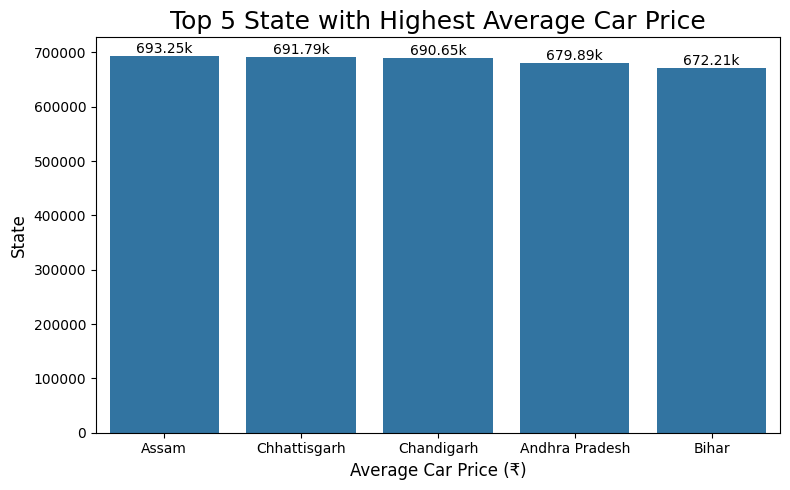

In [85]:
plt.figure(figsize = (8,5))
ax = sns.barplot(y = avg_price_by_state['Average Car Price (₹)'], x = avg_price_by_state['State'])

for i,y in enumerate(avg_price_by_state['Average Car Price (₹)']):
    plt.text(i,y, f"{y/1000:.2f}k", ha = 'center', va = 'bottom')

plt.title('Top 5 State with Highest Average Car Price', fontsize = 18)
plt.xlabel('Average Car Price (₹)', fontsize = 12)
plt.ylabel('State', fontsize = 12)
plt.tight_layout()
plt.show()

In [34]:
df.head()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price,Age of Car
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253,8
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050,7
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923,23
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500,12
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182,14


In [88]:
# Proportion of Fuel Types by State

contingency_table = pd.crosstab(df['State'], df['Fuel Type'])
contingency_table.head()
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

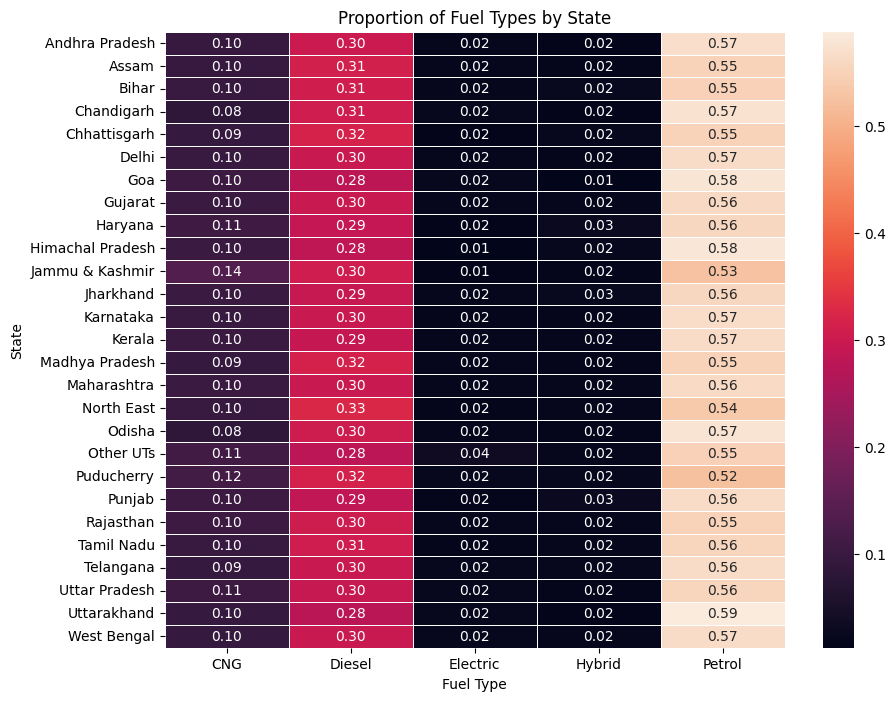

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_normalized, annot=True, fmt=".2f", linewidths=.5)
plt.title('Proportion of Fuel Types by State')
plt.show()